# PubMed Dataset

https://lhncbc.nlm.nih.gov/ii/tools/SemRep_SemMedDB_SKR/dbinfo.html

Il dataset è troppo grande per caricarlo, utilizzo un campione di 100k righe

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
cd C:\Users\Simone\Documents\Desktop

C:\Users\Simone\Documents\Desktop


In [3]:
df = pd.read_csv("df.csv",encoding='ISO-8859-1',header=None, nrows=10000)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,10592604,16,16530475,PROCESS_OF,C0003725,Arboviruses,virs,1,C0999630,Lepus capensis,mamm,1,\N,\N,\N
1,10592697,17,16530475,ISA,C0039258,Tahyna virus,virs,1,C0446169,California Group Viruses,virs,1,\N,\N,\N
2,10592728,17,16530475,ISA,C0318627,Eyach virus,virs,1,C0206590,Coltivirus,virs,1,\N,\N,\N
3,10592759,17,16530475,ISA,C0446169,California Group Viruses,virs,1,C0003725,Arboviruses,virs,1,\N,\N,\N
4,10592832,18,16530475,PROCESS_OF,C0012634,Disease,dsyn,0,C0020114,Human,humn,0,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11887462,22485,16534671,CAUSES,C0001962,Ethanol,orch,1,C0007620,Cell Survival,celf,1,\N,\N,\N
9996,11887622,22487,16534670,PART_OF,C0521421,Entire ear,bpoc,1,C0030705,Patients,humn,0,\N,\N,\N
9997,11887698,22488,16534670,PART_OF,C0521421,Entire ear,bpoc,1,C0030705,Patients,humn,0,\N,\N,\N
9998,11887808,22490,16534670,PART_OF,C0521421,Entire ear,bpoc,1,C0030705,Patients,humn,0,\N,\N,\N


In [4]:
df = df[[3, 5, 9,10]]
nuovi_nomi_colonne = ["PREDICATE", "SUBJECT_NAME", "OBJECT_NAME","OBJECT_SEMTYPE"]  # Sostituisci con i nuovi nomi delle colonne
df.columns = nuovi_nomi_colonne
df

,PREDICATE,SUBJECT_NAME,OBJECT_NAME,OBJECT_SEMTYPE
0,PROCESS_OF,Arboviruses,Lepus capensis,mamm
1,ISA,Tahyna virus,California Group Viruses,virs
2,ISA,Eyach virus,Coltivirus,virs
3,ISA,California Group Viruses,Arboviruses,virs
4,PROCESS_OF,Disease,Human,humn
...,...,...,...,...
9995,CAUSES,Ethanol,Cell Survival,celf
9996,PART_OF,Entire ear,Patients,humn
9997,PART_OF,Entire ear,Patients,humn
9998,PART_OF,Entire ear,Patients,humn


In [5]:
df.describe()

,PREDICATE,SUBJECT_NAME,OBJECT_NAME,OBJECT_SEMTYPE
count,10000,10000,10000,10000
unique,53,3873,3164,100
top,LOCATION_OF,Therapeutic procedure,Patients,humn
freq,1694,176,938,1703


EDA da continuare in caso di eventuale creazione del KG

# Grafo

In [6]:
G = nx.from_pandas_edgelist(df, 'SUBJECT_NAME', 'OBJECT_NAME', ['PREDICATE'])
G


C:\Users\Simone\AppData\Local\Temp\ipykernel_16860\2797845324.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodi_da_visualizzare = random.sample(G.nodes(), 50)


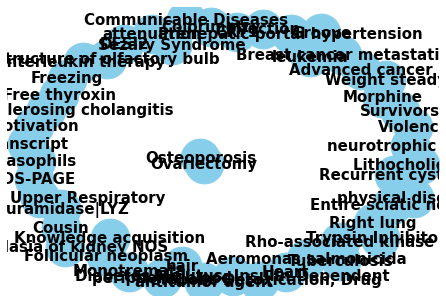

In [11]:
# Limita il numero di nodi da visualizzare a un massimo di 100
if G.number_of_nodes() > 50:
    nodi_da_visualizzare = random.sample(G.nodes(), 50)
else:
    nodi_da_visualizzare = G.nodes()

# Estrai il sottoinsieme del grafo contenente solo i nodi da visualizzare
sottoinsieme_grafo = G.subgraph(nodi_da_visualizzare)

# Visualizza il sottoinsieme del grafo
nx.draw(sottoinsieme_grafo, with_labels=True, node_color='skyblue', node_size=1500, font_size=15, font_weight='bold')
plt.show()

In [7]:
num_nodi = G.number_of_nodes()
num_archi = G.number_of_edges()
print(f"Numero di nodi: {num_nodi}")
print(f"Numero di archi: {num_archi}")

Numero di nodi: 5464
Numero di archi: 8189


In [8]:
centralita = nx.degree_centrality(G)
print("Centralità dei nodi:")
for nodo, centrality in centralita.items():
    print(f"Nodo {nodo}: {centrality}")

Centralità dei nodi:
Nodo Arboviruses: 0.0003660992128866923
Nodo Lepus capensis: 0.0003660992128866923
Nodo Tahyna virus: 0.00018304960644334616
Nodo California Group Viruses: 0.0003660992128866923
Nodo Eyach virus: 0.00018304960644334616
Nodo Coltivirus: 0.00018304960644334616
Nodo Disease: 0.021599853560314845
Nodo Human: 0.029104887424492038
Nodo Virus: 0.0012813472451034232
Nodo Antibodies: 0.003477942522423577
Nodo Binding Protein: 0.0009152480322167308
Nodo FHL1: 0.00018304960644334616
Nodo COMPLEMENT FACTOR H|CFH: 0.00018304960644334616
Nodo Borrelia burgdorferi: 0.0005491488193300384
Nodo XS: 0.0003660992128866923
Nodo homocysteine: 0.0005491488193300384
Nodo Bacteria: 0.003844041735310269
Nodo Methionine: 0.0003660992128866923
Nodo Pheromone: 0.00018304960644334616
Nodo Gene Expression: 0.003844041735310269
Nodo B.S.S.: 0.0003660992128866923
Nodo Adult: 0.008237232289950576
Nodo host: 0.0012813472451034232
Nodo Vertebrates: 0.002013545670876808
Nodo Farm Animals: 0.0003660992

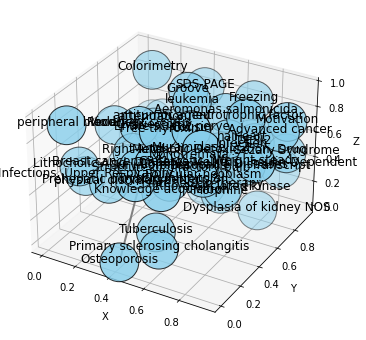

In [12]:
# Creare una visualizzazione 3D del grafo
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Posiziona i nodi in modo casuale in uno spazio 3D
posizioni = {nodo: (random.random(), random.random(), random.random()) for nodo in sottoinsieme_grafo.nodes()}

# Disegna i nodi
nodi = list(sottoinsieme_grafo.nodes())
ax.scatter([posizioni[nodo][0] for nodo in nodi],
           [posizioni[nodo][1] for nodo in nodi],
           [posizioni[nodo][2] for nodo in nodi],
           c='skyblue', s=1500, edgecolors='black')

# Disegna gli archi
for arco in sottoinsieme_grafo.edges():
    ax.plot([posizioni[arco[0]][0], posizioni[arco[1]][0]],
            [posizioni[arco[0]][1], posizioni[arco[1]][1]],
            [posizioni[arco[0]][2], posizioni[arco[1]][2]],
            color='gray', linewidth=2)

# Etichetta i nodi
for nodo, (x, y, z) in posizioni.items():
    ax.text(x, y, z, str(nodo), color='black', fontsize=12, ha='center')

# Impostazioni dell'asse
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()